# Question 1 : Loading the data set and importing all the necessary methods
STEP 1 : Importing all methods

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step 2 : Loading the Zomato dataset to python

In [4]:
data = pd.read_csv('Zomoto.csv')
data.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


# Question 2 :Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [7]:
top_chains_banglore = data["name"].value_counts()
top_chains_banglore

Cafe Coffee Day              18
Keventers                    17
Onesta                       17
McDonald's                   16
SGS Non Veg - Gundu Pulav    16
                             ..
Rufi's Kati Roll              1
MRS Paradise                  1
Cafe Mamma Mia                1
Hotel Food Lands              1
TBC- Sky Lounge               1
Name: name, Length: 4738, dtype: int64

# QUESTION 3: How many restaurants do not accept online orders?


In [9]:
restaurants_no_online_orders = data[data['online_order']=='No']["name"].count()
print("Number of restaurants which do not accept online orders are \n", restaurants_no_online_orders)

Number of restaurants which do not accept online orders are 
 4057


# Question 4.What is the ratio b/w restaurants that provide and do not provide table booking?

In [10]:
ratio_table_booking = data["book_table"].value_counts(normalize = True)
ratio_table_booking

No     0.8754
Yes    0.1246
Name: book_table, dtype: float64

# 5.Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

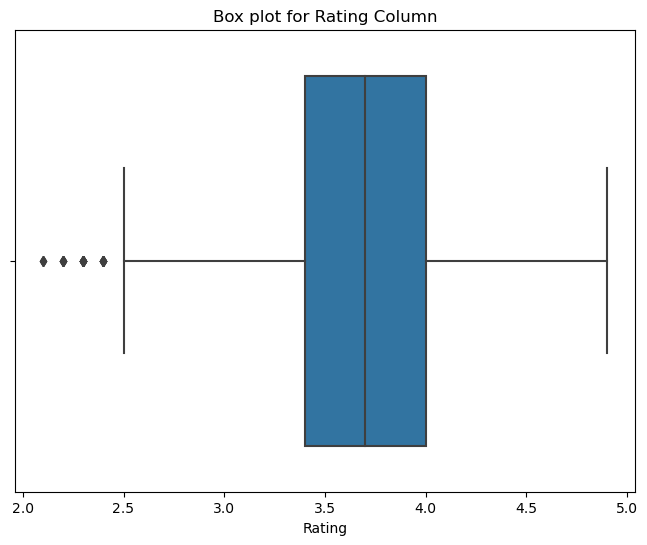

In [13]:
import re

def extract_rating(rating):
    match = re.search(r'\d+\.\d+', str(rating))
    if match:
        return float(match.group())
    else:
        return None

data["rate"] = data["rate"].apply(extract_rating)

data2 = data[data["rate"].notnull()]

plt.figure(figsize = (8,6))
sns.boxplot(x = data["rate"], data = data2)
plt.xlabel("Rating")
plt.title('Box plot for Rating Column')
plt.show()

# Question : 6 Online and Offline orders restaurants percentage.


In [14]:
online_order_percentage = (data["online_order"] == "Yes").mean() * 100
offline_order_percentage = 100 - online_order_percentage

print(online_order_percentage)
print(offline_order_percentage)

59.43000000000001
40.56999999999999


# Question 7 : Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.

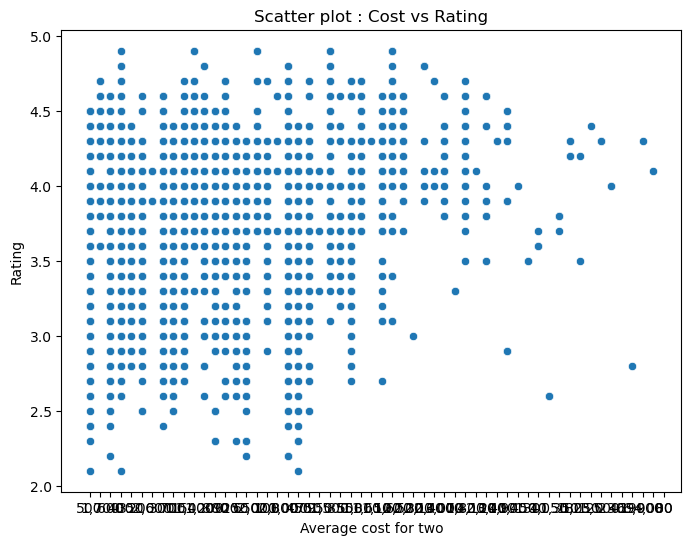

In [16]:
data3 = data2.copy()

def extract_numeric_value(value):
    numeric_part = re.sub(r'\D', '', str(value))
    if numeric_part:
        return int(numeric_part)
    else:
        return None
    
data3["approx_cost(for two people)"] = data3["approx_cost(for two people)"].apply(extract_numeric_value)

data3.dropna(subset = ["approx_cost(for two people)"], inplace = True)

plt.figure(figsize = (8,6))
sns.scatterplot(x = data["approx_cost(for two people)"], y = data["rate"], data = data3)
plt.xlabel("Average cost for two")
plt.ylabel("Rating")
plt.title('Scatter plot : Cost vs Rating')
plt.show()

# Question 8.Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

In [17]:
def distribution_stats(column):
    return{
        "Mean" : column.mean(),
        "Median" : column.median(),
        "Min" : column.min(),
        "Max" : column.max()
    }

votes_stats = distribution_stats(data3["votes"])
cost_stats = distribution_stats(data3["approx_cost(for two people)"])

print(votes_stats)
print(cost_stats)

{'Mean': 360.11660470879804, 'Median': 76.0, 'Min': 0, 'Max': 14956}
{'Mean': 602.6665427509294, 'Median': 500.0, 'Min': 40.0, 'Max': 6000.0}


# Question 9 :Which are the most common restaurant type in Banglore?

In [19]:
common_restaurant_types = data['rest_type'].str.split(", ", expand = True).stack().value_counts()

print("Most common restaurant types in Bangalore:")
print(common_restaurant_types)

Most common restaurant types in Bangalore:
Quick Bites       3930
Casual Dining     2571
Cafe              1017
Delivery           941
Dessert Parlor     632
Bar                470
Takeaway           469
Bakery             389
Beverage Shop      275
Pub                197
Food Court         153
Sweet Shop         136
Lounge             104
Microbrewery        88
Fine Dining         59
Mess                54
Kiosk               29
Food Truck          15
Confectionery       14
Club                 7
Irani Cafee          3
Dhaba                3
Meat Shop            1
dtype: int64


# Question 10.Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [20]:
votes_difference = data.groupby("online_order")["votes"].mean()
votes_difference


online_order
No     278.146907
Yes    302.117449
Name: votes, dtype: float64

# Question 11.Which are the most common restaurant type in Banglore?

In [39]:
restaurant_type_count = df['rest_type'].value_counts()

# Get the most common restaurant types
most_common_types = restaurant_type_count.head(10)  # Adjust the number as needed

print("Most common restaurant types in Bangalore:")
print(most_common_types)

Most common restaurant types in Bangalore:
Quick Bites           3625
Casual Dining         2018
Cafe                   712
Delivery               499
Dessert Parlor         443
Takeaway, Delivery     442
Bakery                 228
Casual Dining, Bar     205
Beverage Shop          150
Bar                    134
Name: rest_type, dtype: int64


# Question 12.Find the Best budget Restaurants in any location.

In [26]:
data3["approx_cost(for two people)"] = pd.to_numeric(data3["approx_cost(for two people)"], errors = 'coerce')

index_of_lowest_cost_restaurants = data3.groupby("location")["approx_cost(for two people)"].idxmin()

for index in index_of_lowest_cost_restaurants:
    restaurant = data3.loc[index]
    print(f"Best budget restaurant in {restaurant['location']}")
    print(f"Restaurant name : {restaurant['name']}")
    print(f"Cuisines : {restaurant['cuisines']}")
    print(f"Average cost for two : {restaurant['approx_cost(for two people)']}")
    print("=" * 50)

Best budget restaurant in BTM
Restaurant name : Nellore Dosa Camp
Cuisines : Andhra, South Indian
Average cost for two : 70.0
Best budget restaurant in Banashankari
Restaurant name : Coffee Bytes
Cuisines : Fast Food, South Indian
Average cost for two : 100.0
Best budget restaurant in Banaswadi
Restaurant name : Kolkata Rolls & Chowmein
Cuisines : Rolls
Average cost for two : 100.0
Best budget restaurant in Bannerghatta Road
Restaurant name : SLV Kabab Centre
Cuisines : Biryani, Fast Food
Average cost for two : 100.0
Best budget restaurant in Basavanagudi
Restaurant name : Dakshin Kitchen
Cuisines : South Indian
Average cost for two : 100.0
Best budget restaurant in Basaveshwara Nagar
Restaurant name : Cream and Bakes
Cuisines : Desserts
Average cost for two : 100.0
Best budget restaurant in Bellandur
Restaurant name : Samosa Corner
Cuisines : Street Food
Average cost for two : 100.0
Best budget restaurant in Bommanahalli
Restaurant name : Jodhpur Jaika
Cuisines : North Indian, Street 

# Question 13.Top quick bites restaurant chains in Banglore.

In [27]:
data5 = data.copy()

data5["rest_type"] = data5["rest_type"].str.lower()
quick_bites_bangalore = data5[data5["rest_type"].apply(lambda rest_type: isinstance(rest_type, str) and "quick bites" in rest_type)]
quick_bites_chains = quick_bites_bangalore.groupby('name')["votes"].sum().reset_index()
top_quick_bites_chains = quick_bites_chains.sort_values(by = "votes", ascending = False)

print("Top quick bites restaurant in Bangalore :")
print(top_quick_bites_chains[['name', 'votes']].head(20))

Top quick bites restaurant in Bangalore :
                             name  votes
1864                    Taco Bell   8618
908                           KFC   6658
559                    Eat Street   4599
301                           CTR   4408
1155                   McDonald's   3994
746                  Hotel Fanoos   3945
293                   Burger King   3848
504            Delite Chaat House   3818
1055                      Le Rock   3612
550                Dunkin' Donuts   3583
685        Gyani Da Punjabi Dhaba   3567
1105                       Maiyas   3564
916                   Kabab Magic   3397
988   Khan Saheb Grills and Rolls   3139
532                Domino's Pizza   3102
894                 Just Shawarma   2897
453                   Cravy Wings   2890
1058                   Leon Grill   2711
464                   D View Cafe   2548
2045                 Veena Stores   2416


# Question 14.Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

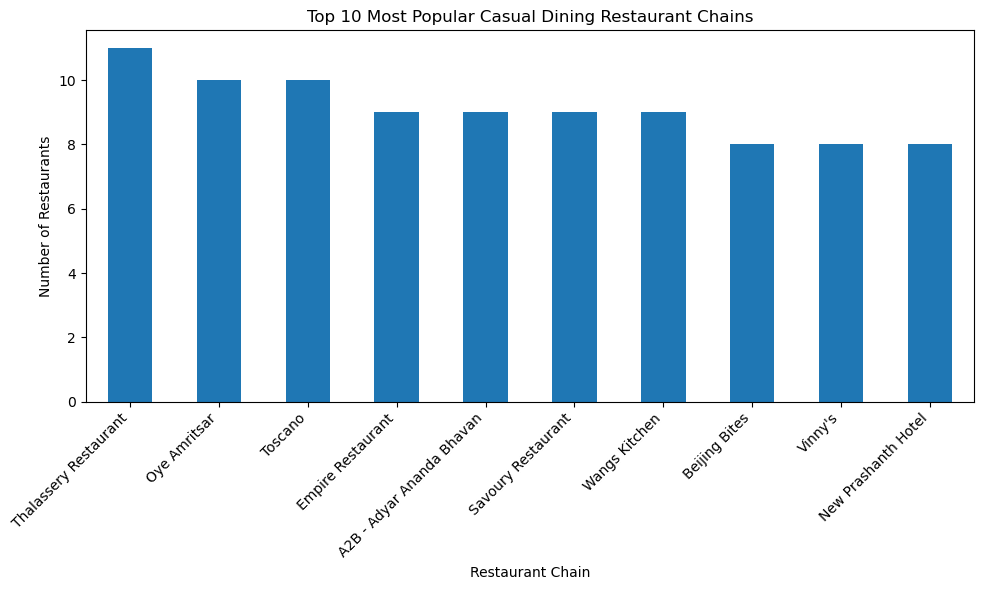

In [45]:
# Filter the dataset to include only casual dining restaurants
casual_dining = df[df['rest_type'] == 'Casual Dining']

# Count the occurrences of each restaurant chain
restaurant_chain_counts = casual_dining['name'].value_counts()

# Get the top 10 most popular casual dining restaurant chains
top_chains = restaurant_chain_counts.head(10)

# Creating a bar plot to visualize the results
plt.figure(figsize=(10, 6))
top_chains.plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Most Popular Casual Dining Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Question 15.Which are the most popular cuisines of Bangalore using a related plot?

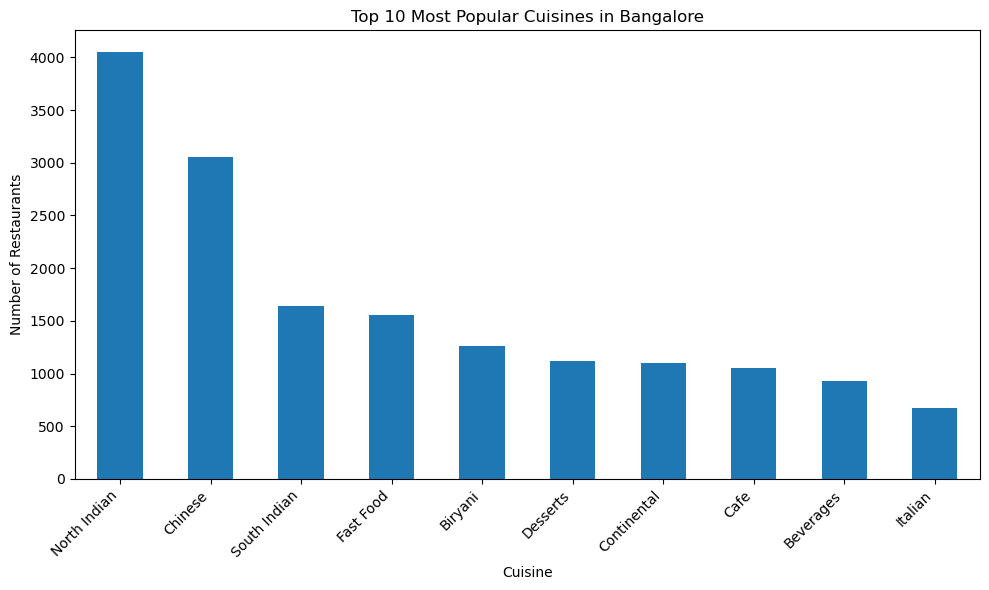

In [47]:
# Count the occurrences of each cuisine
cuisine_counts = df['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Get the top 10 most popular cuisines
top_cuisines = cuisine_counts.head(10)

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Most Popular Cuisines in Bangalore')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
